In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import plotly.express as px
import os, sys, glob

In [230]:
DB = sqlite3.connect('../../DATA/WEBscr.db')
C = DB.cursor()

#sql užklausa per pandas sql_query
sql="""select * from TAutos"""
dfautos = pd.read_sql_query(sql, con=DB)

#sql užklausa per pandas sql_query
sql="""select * from TUrl"""
dfurl = pd.read_sql_query(sql, con=DB)
dfurl.head()

C.close()
DB.close()

In [231]:
dfurl.head(2)

,id,url,name,params
0,26564780,https://autoplius.lt/skelbimai/kita-kita-krovi...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...
1,25881234,https://autoplius.lt/skelbimai/kita-kita-sedan...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...


In [232]:
SDB = sqlite3.connect('../../DATA/WEBscr.db')
C = SDB.cursor()

sql1="""select * from TAutos;"""
df1 = pd.read_sql_query(sql1, con=SDB)

print(df1.columns.tolist())

sql2="""select * from TUrl;"""
df2 = pd.read_sql_query(sql2, con=SDB)

SDB.close()

print(df2.columns.tolist())

['id', 'gamintojas', 'Pirma registracija', 'Kuro tipas', 'Kėbulo tipas', 'Durų skaičius', 'Pavarų dėžė', 'id_', 'auto', 'Rida', 'Taršos mokestis', 'Variklis', 'Elektra nuvažiuojamas atstumas', 'Tech. apžiūra iki', 'Baterijos talpa, kWh', 'Spalva', 'Bendroji masė, kg', 'Varantieji ratai', 'Klimato valdymas', 'Ratlankių skersmuo', 'Nuosava masė, kg', 'Sėdimų vietų skaičius', 'Pirmosios registracijos šalis', 'Kėbulo numeris (VIN)', 'Euro standartas', 'CO₂ emisija, g/km', 'Defektai', 'Pagaminimo data', 'Vairo padėtis', 'Registracijos data', 'Ilgis', 'Aukštis']
['id', 'url', 'name', 'params']


In [233]:
df_with_dubs = pd.merge(df1, df2, on='id', how='inner')
df = df_with_dubs.drop_duplicates()
df.head(2)

,id,gamintojas,Pirma registracija,Kuro tipas,Kėbulo tipas,Durų skaičius,Pavarų dėžė,id_,auto,Rida,...,"CO₂ emisija, g/km",Defektai,Pagaminimo data,Vairo padėtis,Registracijos data,Ilgis,Aukštis,url,name,params
0,26564780,-Kita-,2008-09,Dyzelinas,Krovininis mikroautobusas,Kita,Mechaninė,Skelbimo ID: A26564780,"-Kita- -kita-, krovininis mikroautobusas",None,...,None,None,None,None,None,None,None,https://autoplius.lt/skelbimai/kita-kita-krovi...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...
1,25881234,-Kita-,2011,Elektra,Sedanas,2/3,None,Skelbimo ID: A25881234,"-Kita- -kita-, sedanas",10 km,...,None,None,None,None,None,None,None,https://autoplius.lt/skelbimai/kita-kita-sedan...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...


In [234]:
def get_kaina(x):
    kaina = x.split(';')[-1].split('\n')[0].replace(' ', '').replace('€', '')
    return int(kaina)

df['kaina'] = df['params'].apply(get_kaina)

def amzius(x):
    if x != None:
        return int(2025 - int(x[:4]))
    
df['amzius'] = df['Pirma registracija'].apply(amzius)

def rida(x):
    if x != None:
        return int(x.replace(' ', '').replace('km', ''))
    else:
        return np.nan
    
df['rida'] = df['Rida'].apply(rida)


def galia(x):
    if x != None:
        if 'kW' in x:
            return int(x.split('(')[-1][:-3])
    else:
        return np.nan

df['galia'] = df['Variklis'].apply(galia)    

def baterija(x):
    if x != None:
        return int(x.replace(' ', '').replace('kWh', ''))
    
# df['baterija'] = df['Baterijos talpa, kWh'].apply(baterija)  


def eatstumas(x):
    if x != None:
        return int(x.replace(' ', '').replace('km', ''))
    
# df['eatstumas'] = df['Elektra nuvažiuojamas atstumas'].apply(eatstumas)

# df['R5000'] = df[df['rida'] != None]['rida'].apply(lambda x: float(np.ceil(x/5000) * 5000))
# df['ea50'] = df[df['eatstumas'] != None]['eatstumas'].apply(lambda x: float(np.ceil(x/50) * 50))
df.head(2)

,id,gamintojas,Pirma registracija,Kuro tipas,Kėbulo tipas,Durų skaičius,Pavarų dėžė,id_,auto,Rida,...,Registracijos data,Ilgis,Aukštis,url,name,params,kaina,amzius,rida,galia
0,26564780,-Kita-,2008-09,Dyzelinas,Krovininis mikroautobusas,Kita,Mechaninė,Skelbimo ID: A26564780,"-Kita- -kita-, krovininis mikroautobusas",None,...,None,None,None,https://autoplius.lt/skelbimai/kita-kita-krovi...,-Kita-,-Kita- -kita-;2008-09;Krovininis mikroautobusa...,1750,17.0,NaN,NaN
1,25881234,-Kita-,2011,Elektra,Sedanas,2/3,None,Skelbimo ID: A25881234,"-Kita- -kita-, sedanas",10 km,...,None,None,None,https://autoplius.lt/skelbimai/kita-kita-sedan...,-Kita-,-Kita- -kita-;2011;Sedanas;Elektra;Automatinė;...,3900,14.0,10.0,NaN


In [235]:
# df=df[['gamintojas','amzius','Kuro tipas','rida','galia','kaina']]
# df.columns.tolist()

In [236]:
df=df[['gamintojas','amzius','Kuro tipas','rida','galia','kaina']] # .copy()
# df.replace('Nėra', pd.NA, inplace=True)
df.dropna(inplace=True)

In [237]:
df.head(3)

,gamintojas,amzius,Kuro tipas,rida,galia,kaina
2,-Kita-,5.0,Elektra,14000.0,29.0,6800
4,Abarth,8.0,Benzinas,75000.0,125.0,18900
5,Acura,12.0,Benzinas,217262.0,221.0,9100


In [238]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [239]:
gamLE = LabelEncoder()
gamLE.fit(df['gamintojas'])
df['gamintojas'] = gamLE.transform(df['gamintojas'])

ktLE = LabelEncoder()
ktLE.fit(df['Kuro tipas'])
df['Kuro tipas'] = ktLE.transform(df['Kuro tipas'])

df.head(3)

,gamintojas,amzius,Kuro tipas,rida,galia,kaina
2,0,5.0,6,14000.0,29.0,6800
4,1,8.0,0,75000.0,125.0,18900
5,2,12.0,0,217262.0,221.0,9100


In [240]:
Y_target = df['kaina']
X_features = df.drop(columns=['kaina'])
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_target, test_size=0.15, random_state=0)

print(X_train)

       gamintojas  amzius  Kuro tipas      rida  galia
8847           19    11.0           4  342000.0   88.0
13581          32    12.0           4  247500.0   81.0
23629          63    12.0           0  200000.0  135.0
12002          27    10.0           4  337000.0   70.0
1400            8     2.0           4   34194.0  150.0
...           ...     ...         ...       ...    ...
16336          52     3.0           0   45062.0  316.0
24745          66    17.0           0  122000.0   70.0
12185          27    12.0           4  181300.0  120.0
13409          32     8.0           2  226000.0   77.0
3214            8    17.0           4  275000.0  171.0

[24003 rows x 5 columns]


In [241]:
scaler = StandardScaler()
scaler.fit(X_train[['amzius','rida','galia']])
X_train_scaled = scaler.transform(X_train[['amzius','rida','galia']])

print(X_train)
# print(X_train_scaled)

       gamintojas  amzius  Kuro tipas      rida  galia
8847           19    11.0           4  342000.0   88.0
13581          32    12.0           4  247500.0   81.0
23629          63    12.0           0  200000.0  135.0
12002          27    10.0           4  337000.0   70.0
1400            8     2.0           4   34194.0  150.0
...           ...     ...         ...       ...    ...
16336          52     3.0           0   45062.0  316.0
24745          66    17.0           0  122000.0   70.0
12185          27    12.0           4  181300.0  120.0
13409          32     8.0           2  226000.0   77.0
3214            8    17.0           4  275000.0  171.0

[24003 rows x 5 columns]


In [242]:
# PR_sc, R_sc, V_sc = zip(*X_train_scaled)
# X_train['amzius'] = PR_sc
# X_train['rida'] = R_sc
# X_train['galia'] = V_sc
# X_train.head(3)

In [243]:
scaled_col_means = np.mean(X_train_scaled, axis=0)
scaled_col_std = np.std(X_train_scaled, axis=0, ddof=0)  # ddof=0 reiškia populacijos std

# Gražiname rezultatus
print('Vidurkis:',scaled_col_means)
print('Std nukr:',scaled_col_std)

Vidurkis: [-1.02423775e-16 -1.21369213e-17  1.92562617e-16]
Std nukr: [1. 1. 1.]


In [244]:
# Apmokinome X_train
# Dabar su standart Scaler rescaliname X_test:
X_test_scaled = scaler.transform(X_test[['amzius','rida','galia']])
X_test_scaled[:,0], X_test_scaled[:,1], X_test_scaled[:,2]

(array([-0.63328201, -0.94747523, -0.4761854 , ...,  2.50865021,
         1.09478071,  1.25187732]),
 array([-0.41807648, -0.97802769, -0.5074304 , ..., -0.89090763,
         0.3265395 ,  1.96326498]),
 array([ 1.56933166,  1.64092079, -0.678567  , ..., -0.09153614,
        -1.15105525,  0.42390559]))

In [245]:
X_test['amzius']

19914     8.0
4402      6.0
12793     9.0
170      25.0
4762      9.0
         ... 
2130     12.0
33443    21.0
9986     28.0
9389     19.0
307      20.0
Name: amzius, Length: 4236, dtype: float64

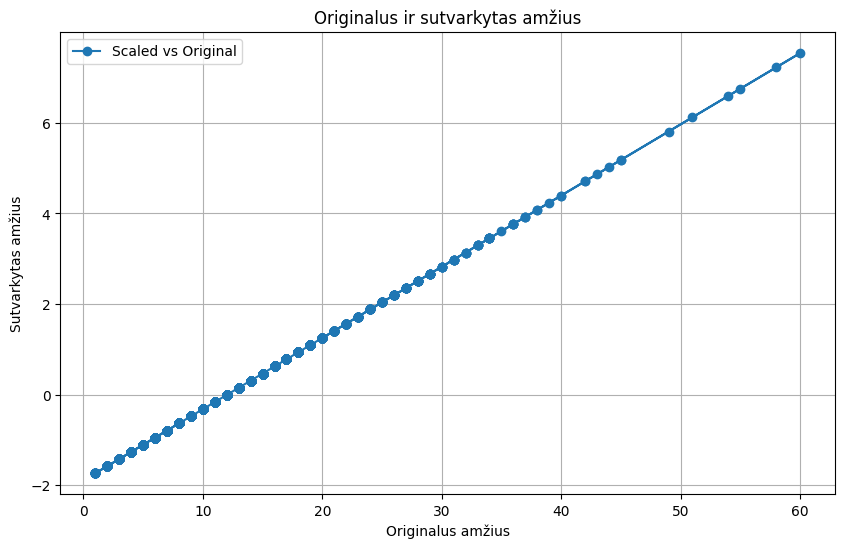

In [246]:
plt.figure(figsize=(10, 6))

plt.plot(X_test['amzius'], X_test_scaled[:,0], label='Scaled vs Original', linestyle='-', marker='o')

plt.xlabel('Originalus amžius')
plt.ylabel('Sutvarkytas amžius')
plt.title('Originalus ir sutvarkytas amžius')
plt.legend()
plt.grid(True)

# Parodome grafiką
plt.show()

In [247]:
PR_sc, R_sc, V_sc = zip(*X_test_scaled)
X_test['amzius'] = PR_sc
X_test['rida'] = R_sc
X_test['galia'] = V_sc
X_test.head()

,gamintojas,amzius,Kuro tipas,rida,galia
19914,56,-0.633282,0,-0.418076,1.569332
4402,8,-0.947475,2,-0.978028,1.640921
12793,30,-0.476185,4,-0.507430,-0.678567
170,6,2.037360,4,0.207401,0.638673
4762,11,-0.476185,4,0.344313,0.065960


In [248]:
linearML = LinearRegression() # lininis modelis
linearML.fit(X_train, y_train) # apmokinimas

LinearRegression()

In [249]:
y_predicted = linearML.predict(X_test)

In [250]:
import sklearn

print(sklearn.metrics.mean_squared_error(y_test, y_predicted))

377335696.3049916


In [251]:
rmse = sklearn.metrics.mean_squared_error(y_test, y_predicted)**(1/2)
rmse

19425.130535082426

In [252]:
# MinMaxScaler()